In this tutorial, you will learn how to apply eXplainable methods to machine learning models for tabular data. The goal is to understand how the models operate and what are the main criterias used for the decision making. Since we are working with tabular data, we will consider a  very familiar use-case.

In particular, we are going to focus on a specific explanation model called SHapley Additive exPlanations, SHAP (https://arxiv.org/pdf/1705.07874.pdf). It will be implemented using the framework developed by Lundberg in https://github.com/slundberg/shap.

Based on game theory, SHAP considers each feature as a "player" in a cooperative game. In a nutshell, what SHAP does is quantifying the contribution that each feature brings to the prediction given by the model.

In this notebook we will learn how the SHAP values are computed mathematically with a simple example and then focus on a critical aplication of Machine Learning models: Bipolar Disorder Crisis Prediction.



### Shapley values: Definition

One of the main contribution of SHAP is to consider the explanation as a model itself. The explanation model is a linear function of a binary variable:


\begin{equation}
g(z') = \phi_0 + \sum_{i=1}^{M}\phi_i z'_i
\end{equation}

where $z' \in \{0,1\}^M $, M is the number of simplified features, and $\phi_i \; in \; \mathbb{R}$. *z'* represents the simplified features vector, $\phi_i $ is the feature attribution for feature *i*.

\begin{equation}
\phi_i = \sum_{S \subseteq F \ \{i\}} \frac{\mid S\mid! (\mid F\mid - \mid S\mid - 1)!}{\mid F\mid !} [f_{S \bigcup \{i\}}(x_{S \bigcup \{i\}}) - f_S(x_S)]
\end{equation}

where $f$ represents the model function, and $S \subseteq F $, where $F$ is the set of all features and $S$ a subset of $F$. Shap values are a weighted average of all possible difference subsets. $\mid S \mid$ represents the number of elements of subset $S$.

The Shapley value is a method that satisfies four properties: Efficiency, Symmetry, Dummy and Additivity.

Efficiency refers to the fact that the feature contribution must add up to the difference of the prediction for a given $x$ and the average.

The Symmetry property obligates the contributions of to feature values to be the same if they contribute identically to all possible coalitions.

Additivity: For bagging ensemble algorithms (i.e., bagging methods consist on fitting different models on the dataset and then average the outcome of each model), it means that the shap value can computed using the individual shap values for each independant model of the bagging algorithm.

Finally, the Dummy property is defined as the property of the shapley value that assures that the contribution of a feature that do not change the predicted value of the coalition of feature values that it has been added to
is equal to zero.

To be able to understand the Shap values, what they mean and how they are computed, we are going to consider a simple example: Let's imagine we have a model (any machine learning model) that outputs the  probability of not paying your credit given a set of 3 features (for instance age, localization and income).

SHAP values consider each combiniation or coalition of players (i.e., features) to determine the importance of a single player (i.e., features). As we are considering a simple set of 3 features, the number of different models with different sets of features we have to build are $2^3$. It is important to remark that all models are constructed with the same hyperparameters.



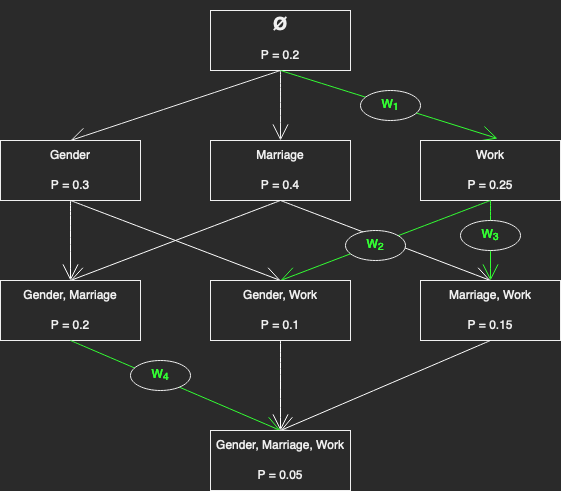

The output of the empty set ($\phi_0)$ is the number of total positive class cases over the number of data points. In this simple example the number of positive classes is 0.2. Now let's take a look on how the prediction of the model changes when we add the feature income for a single datapoint $x$. The considered set is the empty set.

$S_0 = \{\emptyset\}$

$f_{S_0}(x_{S_0}) = 0.2$

$f_{S_0 \bigcup \{work\}}(x_{S_0 \bigcup \{work\}}) = 0.25$

Now we consider all subsets of $F$ that that do not contain the feature *income*  ($S \subseteq F \ \{i\}$) and check the difference on the model's output when we consider the same subset, but adding the feature income.

$S_1 = \{gender\}$

$f_{S_1}(x_{S_1}) = 0.3$

$f_{S_1 \bigcup \{work\}}(x_{S_1 \bigcup \{work\}}) = 0.25$


$S_2 = \{Marriage\}$

$f_{S_2}(x_{S_2}) = 0.4$

$f_{S_2 \bigcup \{work\}}(x_{S_2 \bigcup \{work\}}) = 0.15$

$S_3 = \{Marriage, gender\}$

$f_{S_3}(x_{S_3}) = 0.2$

$f_{S_3 \bigcup \{work\}}(x_{S_3 \bigcup \{work\}}) = 0.05$

Once we find all model outputs for all different susbsets, we compute a weighted average of the model's output, with and without the feature.

The criteria the weights have to meet are the following:
  1. $\sum_{i} w_i = 1$
  2. $w_1 = w_2 + w_3 = w_4$

As mentioned above we are just considering the impact of the feature *income* in the model's outcome. To obtain the Shap values for the rest of the features we repeat the same strategy.

Let's apply the formula to obtain the Shap values $\phi_i$. Since we have four subsets that do not contain the feature *income*, we are going to feature attribution for each subset.

Feature attribution for $S_0$:

\begin{equation}
\frac{\mid S_0\mid! (\mid F\mid - \mid S_0\mid - 1)!}{\mid F\mid !} [f_{S_0 \bigcup \{i\}}(x_{S_0 \bigcup \{i\}}) - f_{S_0}(x_{S_0})] = \frac{0! (3 - 0 - 1)!}{3!} [0.25-0.2] = \frac{1}{3}0.05
\end{equation}

Now we repeat the same computation for $S_1$ , $S_2$, and $S_3$

For $S_1$: $\frac{1}{6}(-0.05)$

For $S_2$: $\frac{1}{6}(-0.25)$

For $S_3$: $\frac{1}{3}(-0.15)$

$\phi_i = \frac{1}{3}0.05 + \frac{1}{6}(-0.05) + \frac{1}{6}(-0.25) + \frac{1}{3}(-0.15) = -\frac{1}{6}0.5$

## Use Case: Bipolar Disease Crisis Prediction

Now that we know how to compute Shap values to understand the model, we are going to focus on a critical use case that directly impacts us in our daily economic activity: Bipolar Disease Crisis Prediction.

Bipolar disorder, formerly called manic depression, is a mental health condition that causes extreme mood swings that include emotional highs (mania or hypomania) and lows (depression) which often come accompanied by different features (i.e., physical and psychological features).

In this notebook we will create a Bipolar Disease Crisis Prediciton Model using the data available [here](https://datasets.simula.no/depresjon/) and then apply XAI method SHAP to help psychiatrists to understand the causes behind a potential patient tendency towards a mania or depression episode.


The use case is organized as follows:
1. We load the processed data.
2. We develop a Machine Learning based model for the bipolar disease prediction: the [XGBoost](https://arxiv.org/abs/1603.02754).
3. We apply SHAP Values (https://github.com/slundberg/shap) to explain the ML model outputs


In [1]:
################## Downdload the git repository ############
! git clone https://github.com/AsifAhmedShodip/xai-assignment01.git

Cloning into 'xai-assignment01'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 29 (delta 3), reused 13 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 57.16 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
######### Change  directory for running the data processing scripts
import os
os.chdir('xai-assignment01')

In [3]:
%run ./src/setup.py
# %run ./src/process_data.py

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 5.0 MB/s eta 0:00:00a 0:00:01
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached category_encoders-2.8.0-py3-none-any.whl (85 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 30.9 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00ta 0:00:01
  Using cached dice_ml-0.11-py3-none-any.whl.metadata (20 kB)
  Using cached raiutils-0.4.2-py3-none-any.whl.metadata (1.4 kB)
Using cached dice_ml-0.11-py3-none-any.whl (2.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━

### Setting the Environment

In [4]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

pd_options = {
'display.max_rows': 500,
'display.max_columns': 500,
'display.width': 1000,
}
for option, setting in pd_options.items():
  pd.set_option(option, setting)


import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=16)

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import model_selection



In [5]:
import pandas as pd

feature_names = [
    "ID", "Diagnosis",
    "Radius(Mean)", "Texture(Mean)", "Perimeter(Mean)", "Area(Mean)", "Smoothness(Mean)",
    "Compactness(Mean)", "Concavity(Mean)", "ConcavePoints(Mean)", "Symmetry(Mean)", "FractalDimension(Mean)",
    "Radius(SE)", "Texture(SE)", "Perimeter(SE)", "Area(SE)", "Smoothness(SE)",
    "Compactness(SE)", "Concavity(SE)", "ConcavePoints(SE)", "Symmetry(SE)", "FractalDimension(SE)",
    "Radius(Worst)", "Texture(Worst)", "Perimeter(Worst)", "Area(Worst)", "Smoothness(Worst)",
    "Compactness(Worst)", "Concavity(Worst)", "ConcavePoints(Worst)", "Symmetry(Worst)", "FractalDimension(Worst)"
]

file_path = "./data/wdbc.data"  

df = pd.read_csv(file_path, header=None, names=feature_names)

df = df.drop(columns=["ID"])

df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

print("Dataset Information:\n")
print(df.info())

print("\nFirst 5 Rows:\n")
print(df.head())

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nSummary Statistics:\n")
print(df.describe())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius(Mean)             569 non-null    float64
 2   Texture(Mean)            569 non-null    float64
 3   Perimeter(Mean)          569 non-null    float64
 4   Area(Mean)               569 non-null    float64
 5   Smoothness(Mean)         569 non-null    float64
 6   Compactness(Mean)        569 non-null    float64
 7   Concavity(Mean)          569 non-null    float64
 8   ConcavePoints(Mean)      569 non-null    float64
 9   Symmetry(Mean)           569 non-null    float64
 10  FractalDimension(Mean)   569 non-null    float64
 11  Radius(SE)               569 non-null    float64
 12  Texture(SE)              569 non-null    float64
 13  Perimeter(SE)            569 non-null    float64
 14  Area

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:]) 

In [7]:
print(df.head(5))

   Diagnosis  Radius(Mean)  Texture(Mean)  Perimeter(Mean)  Area(Mean)  Smoothness(Mean)  Compactness(Mean)  Concavity(Mean)  ConcavePoints(Mean)  Symmetry(Mean)  FractalDimension(Mean)  Radius(SE)  Texture(SE)  Perimeter(SE)  Area(SE)  Smoothness(SE)  Compactness(SE)  Concavity(SE)  ConcavePoints(SE)  Symmetry(SE)  FractalDimension(SE)  Radius(Worst)  Texture(Worst)  Perimeter(Worst)  Area(Worst)  Smoothness(Worst)  Compactness(Worst)  Concavity(Worst)  ConcavePoints(Worst)  Symmetry(Worst)  FractalDimension(Worst)
0          1      1.097064      -2.073335         1.269934    0.984375          1.568466           3.283515         2.652874             2.532475        2.217515                2.255747    2.489734    -0.565265       2.833031  2.487578       -0.214002         1.316862       0.724026           0.660820      1.148757              0.907083       1.886690       -1.359293          2.303601     2.001237           1.307686            2.616665          2.109526              2.29607

In [8]:
df.sample(n=3)

,Diagnosis,Radius(Mean),Texture(Mean),Perimeter(Mean),Area(Mean),Smoothness(Mean),Compactness(Mean),Concavity(Mean),ConcavePoints(Mean),Symmetry(Mean),FractalDimension(Mean),Radius(SE),Texture(SE),Perimeter(SE),Area(SE),Smoothness(SE),Compactness(SE),Concavity(SE),ConcavePoints(SE),Symmetry(SE),FractalDimension(SE),Radius(Worst),Texture(Worst),Perimeter(Worst),Area(Worst),Smoothness(Worst),Compactness(Worst),Concavity(Worst),ConcavePoints(Worst),Symmetry(Worst),FractalDimension(Worst)
556,0,-1.126767,0.069894,-1.121981,-0.976065,0.280372,-0.555297,-1.051784,-0.973959,-0.075277,0.072637,-0.581343,1.584188,-0.602977,-0.517856,1.956420,-0.182096,-0.919103,-0.764679,0.626908,-0.573771,-1.163636,-0.455510,-1.173002,-0.937465,-0.257255,-0.854113,-1.257616,-1.405205,-1.033367,-0.915792
518,0,-0.354249,-0.248914,-0.309710,-0.460145,1.810429,1.170425,-0.509095,0.106035,-0.374655,1.379668,0.135085,-0.086823,0.153430,-0.131286,-0.589350,-0.122294,-0.591645,0.104441,-0.288445,-0.187576,-0.252473,-0.212873,-0.236834,-0.361925,0.580010,0.266129,-0.708059,-0.076228,-0.515677,0.276203
15,1,0.117215,1.919912,0.196105,0.011123,1.248222,1.045345,0.942887,0.637649,1.794006,1.130169,-0.126943,-0.333573,0.006406,-0.171329,-0.478012,0.945755,0.514474,-0.145362,-0.238803,0.632094,0.246596,1.865014,0.501557,0.110075,1.553167,2.566410,2.064909,0.861731,2.131012,2.779335


**Target Distribution**


- Malignant (M): **1**

- Benign (B): **0**

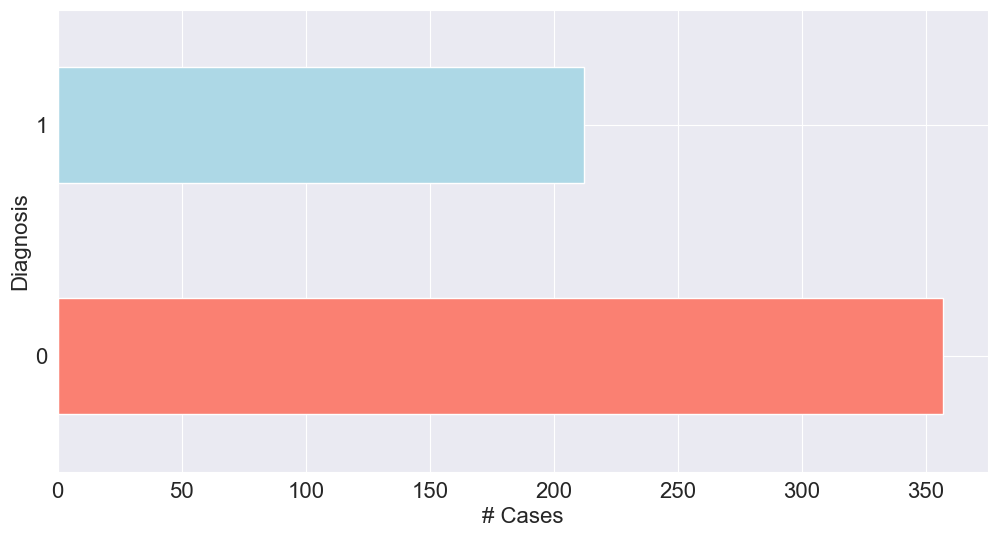

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))

counter = df["Diagnosis"].value_counts()
counter.rename(index={"M": "Malignant", "B": "Benign"}, inplace=True)

counter.plot(kind="barh", ax=ax, color=["salmon", "lightblue"])
ax.set_xlabel("# Cases", size=16)
ax.set_ylabel("Diagnosis", size=16)

plt.show()

In [10]:
x = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=80,
                                                                    stratify=y)

In [12]:
print("Length of X_train:", len(x_train))
print("Length of X_test:", len(x_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of X_train: 398
Length of X_test: 171
Length of y_train: 398
Length of y_test: 171


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
from sklearn.metrics import accuracy_score
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9825


In [15]:
from sklearn.metrics import confusion_matrix

misclassified = y_test != y_pred
misclassified_labels = y_test[misclassified]
misclassified_counts = misclassified_labels.value_counts()

print(f"Total misclassified samples: {misclassified.sum()}")
print("Misclassified cases per class:")
print(misclassified_counts.to_string(index=True))

Total misclassified samples: 3
Misclassified cases per class:
1    2
0    1


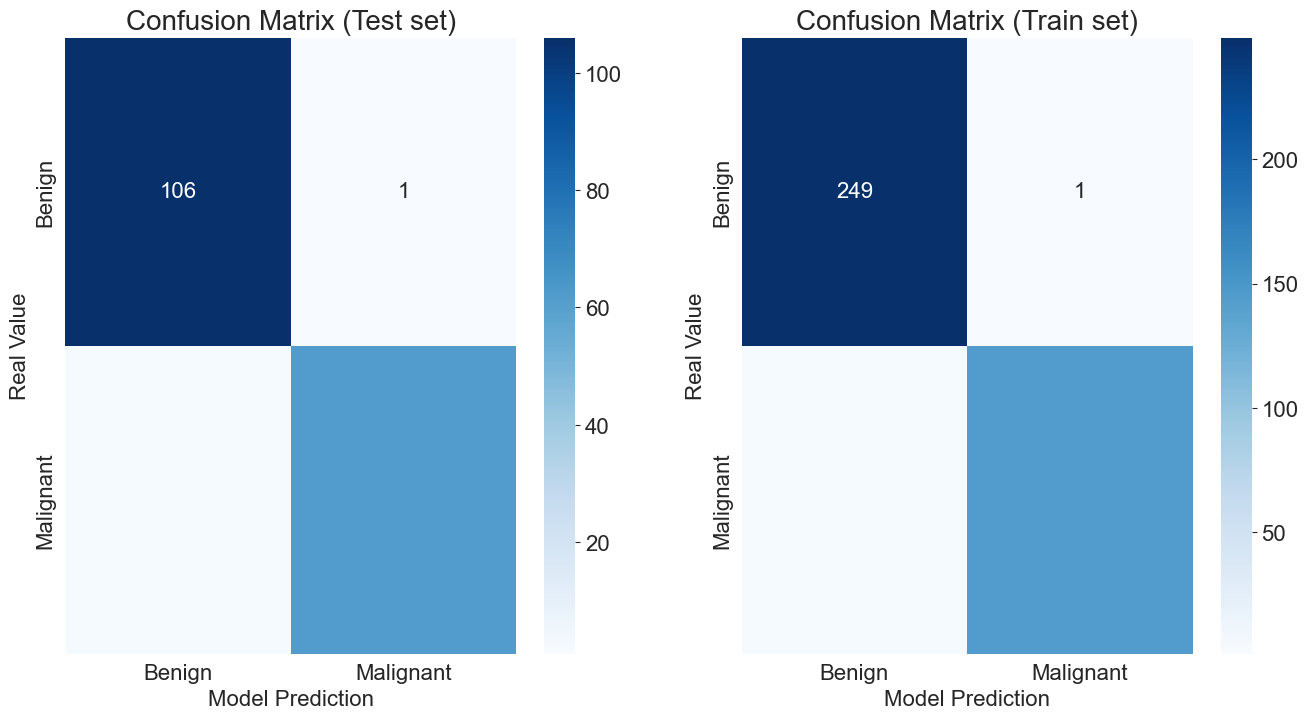

In [16]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

cf_test = confusion_matrix(y_test, y_pred_test)
cf_train = confusion_matrix(y_train, y_pred_train)

class_names = ["Benign", "Malignant"]

cf_test_df = pd.DataFrame(cf_test, columns=class_names, index=class_names)
cf_train_df = pd.DataFrame(cf_train, columns=class_names, index=class_names)

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

sns.heatmap(cf_test_df, fmt="d", annot=True, ax=ax[0], cmap="Blues")
ax[0].set_xlabel("Model Prediction", size=16)
ax[0].set_ylabel("Real Value", size=16)
ax[0].set_title("Confusion Matrix (Test set)", size=20)

sns.heatmap(cf_train_df, fmt="d", annot=True, ax=ax[1], cmap="Blues")
ax[1].set_xlabel("Model Prediction", size=16)
ax[1].set_ylabel("Real Value", size=16)
ax[1].set_title("Confusion Matrix (Train set)", size=20)

plt.show()

## SHAP Values

Now we are going to use what we learnt from the SHAP values to understand how our model works. We use the framework developed by Lundberg et al. https://github.com/slundberg/shap

In [17]:
! pip install shap

In [18]:
import shap

**We are going to explain the xgboost model. Since the model developed previously is a tree based we are going to use Tree explainer, a fast implementation to compute Shap values when models are tree based**

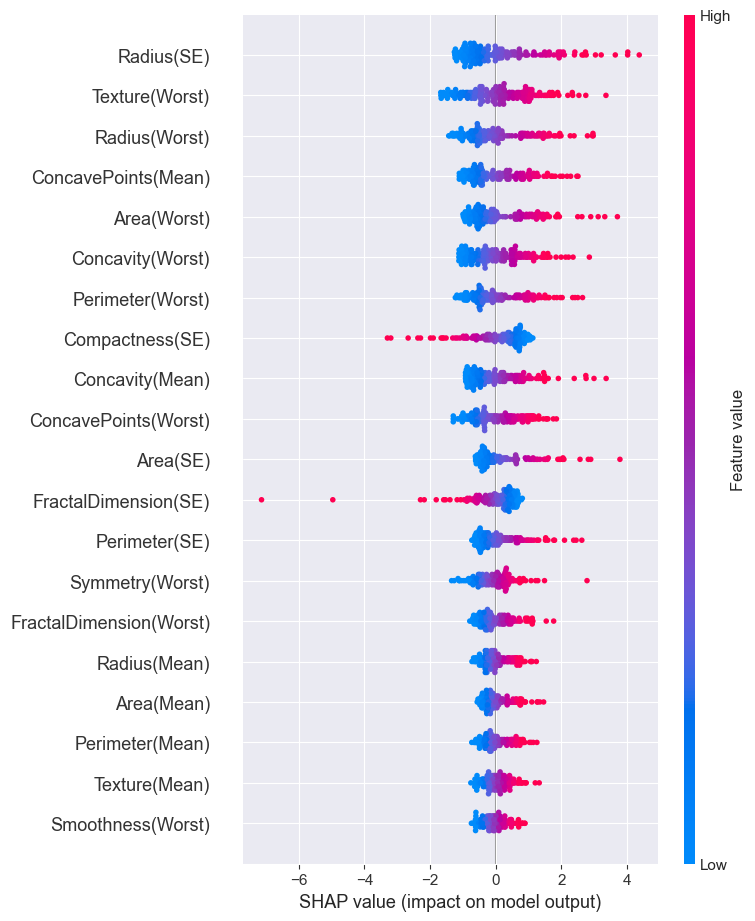

In [19]:
# explainer = shap.TreeExplainer(xgb, x, model_output = "raw")
# shap_values = explainer.shap_values(x)

explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

**Local interpretability: How do we interpret the SHAP force plot?**


The value we observe in bold is the natural logarithm of the odd ratio $ln(\frac{P(Y=1)}{1-P(Y=1)})$. The base value is the odd ratio if we just consider the number of positive cases over the total of instances. The Shapley values can be understood as forces that push the output of the model. Forces of Shapley values in blue represent the features that increase the probability of default, while red values represent the features that are incrementing the probability of having a bipolar disease.

A force plot allows us to study a concrete case in order to give a reason for diagnosing a potential bipolar disease.

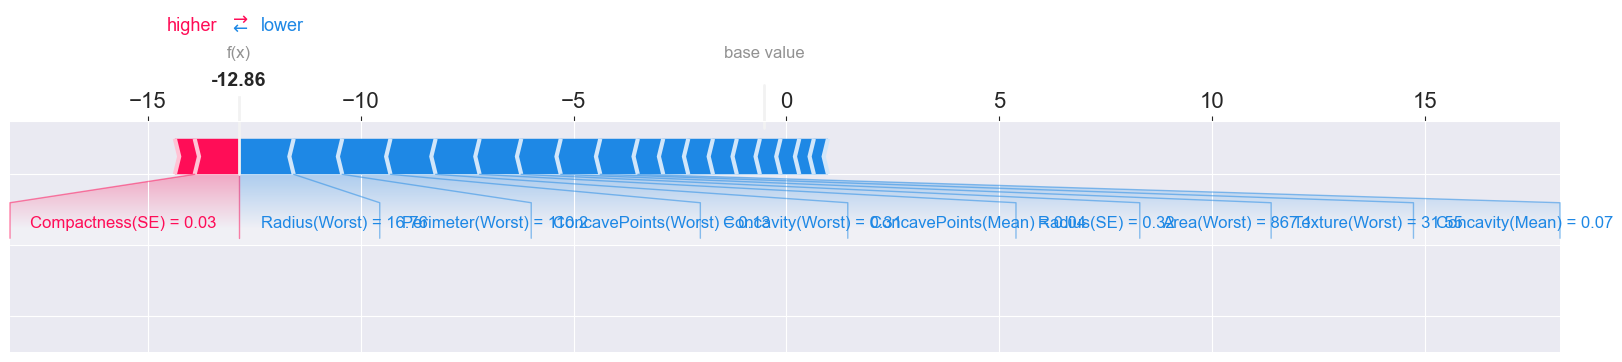

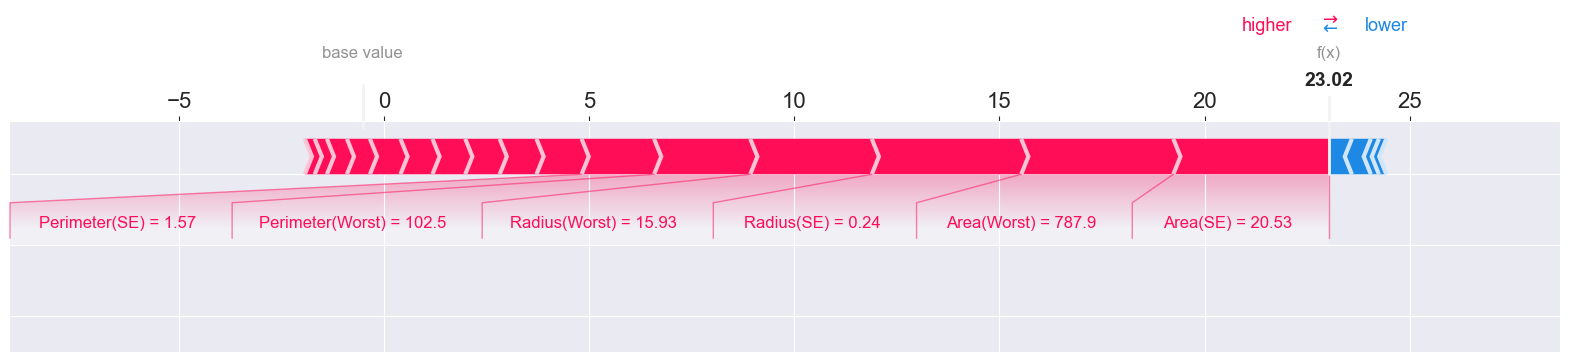

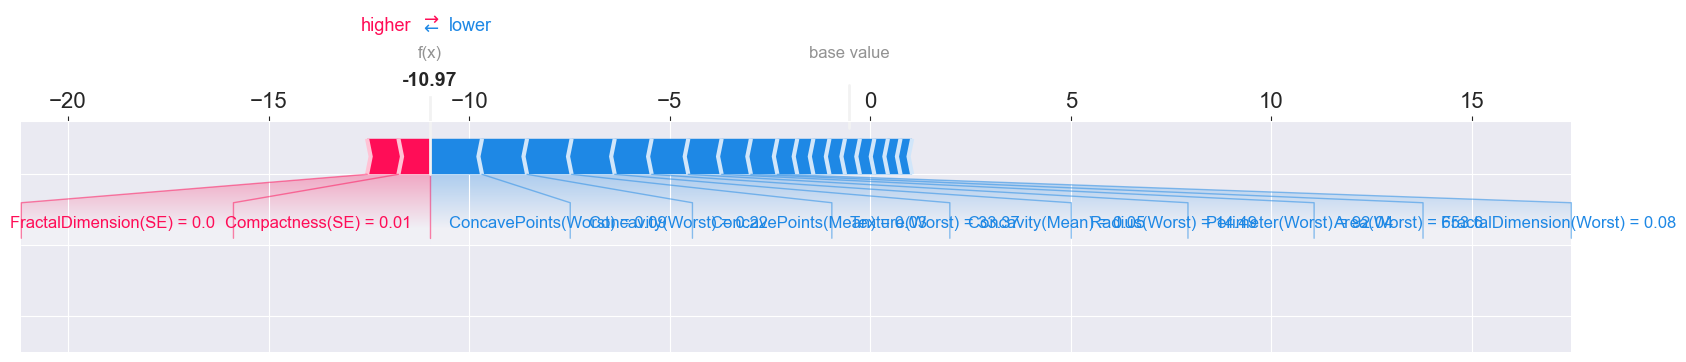

In [20]:
import shap
import numpy as np

shap.initjs()

misclassified_indices = y_test != y_pred
misclassified_x_scaled = x_test[misclassified_indices]

misclassified_x_original = scaler.inverse_transform(misclassified_x_scaled)
misclassified_x_original = pd.DataFrame(misclassified_x_original, columns=x_test.columns)

top_k = 20

for i in range(len(misclassified_x_scaled)):
    shap_values_instance = shap_values[i]  
    sorted_features = abs(shap_values_instance.values).argsort()[-top_k:]

    formatted_values = misclassified_x_original.iloc[i, sorted_features].round(2)

    shap.force_plot(
        explainer.expected_value,
        shap_values_instance.values[sorted_features],  
        formatted_values,  
        matplotlib=True
    )

In [21]:
diagnosis_map = {1: "Malignant", 0: "Benign"}

misclassified_indices = y_test[y_test != y_pred].index

for patient_index in misclassified_indices:
    print("------- Patient Index:", patient_index, "------")
    
    real_diagnosis = y_test.loc[patient_index].item()
    print("Patient Real Diagnosis:", diagnosis_map[real_diagnosis])
    
    pred_class = y_pred[y_test.index.get_loc(patient_index)] 
    pred_diagnosis = diagnosis_map[pred_class]
    
    prob = model.predict_proba(x_test.loc[[patient_index]])[0][pred_class]
    print(f"Probability of being diagnosed as {pred_diagnosis}: {round(prob, 3)}\n")

------- Patient Index: 413 ------
Patient Real Diagnosis: Benign
Probability of being diagnosed as Malignant: 0.594

------- Patient Index: 40 ------
Patient Real Diagnosis: Malignant
Probability of being diagnosed as Benign: 0.919

------- Patient Index: 135 ------
Patient Real Diagnosis: Malignant
Probability of being diagnosed as Benign: 0.907



In [22]:
import random

diagnosis_map = {1: "Malignant", 0: "Benign"}

random_indices = random.sample(list(y_test.index), 5)

for patient_index in random_indices:
    print("------- Patient Index:", patient_index, "------")
    
    real_diagnosis = y_test.loc[patient_index].item()
    print("Patient Real Diagnosis:", diagnosis_map[real_diagnosis])
    
    pred_class = y_pred[y_test.index.get_loc(patient_index)]  # Get corresponding position in y_pred
    pred_diagnosis = diagnosis_map[pred_class]
    
    prob = model.predict_proba(x_test.loc[[patient_index]])[0][pred_class]
    print(f"Probability of being diagnosed as {pred_diagnosis}: {round(prob, 3)}\n")

------- Patient Index: 53 ------
Patient Real Diagnosis: Malignant
Probability of being diagnosed as Malignant: 1.0

------- Patient Index: 232 ------
Patient Real Diagnosis: Benign
Probability of being diagnosed as Benign: 0.995

------- Patient Index: 70 ------
Patient Real Diagnosis: Malignant
Probability of being diagnosed as Malignant: 1.0

------- Patient Index: 198 ------
Patient Real Diagnosis: Malignant
Probability of being diagnosed as Malignant: 1.0

------- Patient Index: 46 ------
Patient Real Diagnosis: Benign
Probability of being diagnosed as Benign: 1.0



**Global interpretability: SHAP Summary plot.**

The SHAP summary plot allows us to understand the model by ranking the features from the most relevant to the least important ones. Each datapoint represents a different person. In this concrete use case, the most relevant feature are: the variation of the activity mesasurements obtained of the actigraph watch, the Montgomery Asberg Depression Rating Scale at the moment the actigraph was stopped. High values of these features impact negatively in the output of the model (the probability of having a bipolar disease increases).

SHAP Values Shape: (171, 30)
x_test Shape: (171, 30)


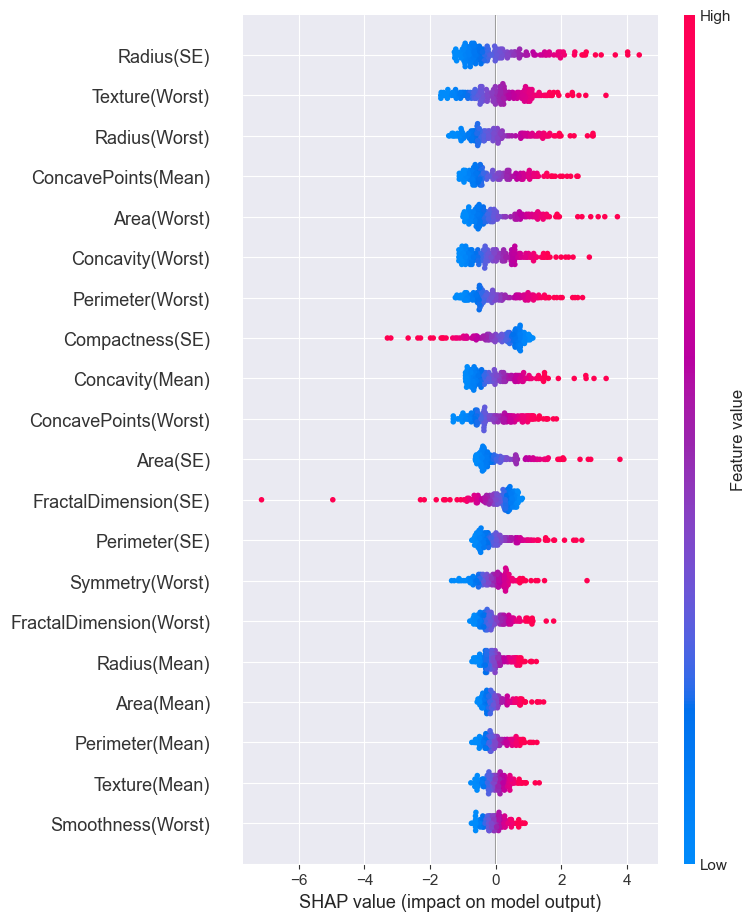

In [23]:
# shap.summary_plot(shap_values, x, show=False)
# plt.savefig("shap_summary_plot.png", bbox_inches="tight")

import shap
import matplotlib.pyplot as plt

print("SHAP Values Shape:", shap_values.shape)
print("x_test Shape:", x_test.shape)

shap.summary_plot(shap_values, x_test, show=True)

plt.savefig("shap_summary_plot.png", bbox_inches="tight")
plt.close() 